<a href="https://colab.research.google.com/github/DaniilAszn/Sci-tech_methods_course/blob/main/Dimensionless_complexes_Dataset_Automobiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Методы научно-технического прогнозирования**

*Тема работы: Анализ набора данных легковых автомобилей (БМВ и Митсубиши) с помощью методов теории безразмерных комплексов.*

## Этап 0: Данные.

Датасет был найден на просторах сети. Он содержит в себе информацию о легковых автомобилях БВМ и Митсубиши. Информация представлена в виде технических характеристик каждого экземпляра автомобиля.

Необходимый инструментарий для работы с таблицей данных, расчётов и визуализации.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
plt.style.use('ggplot')

Подгрузим наш датасет для проведения анализа.

In [ ]:
df = pd.read_csv('Automobiles.txt', delimiter='\t')
df

,Марка,Серия,Полная масса [кг],Максимальный крутящий момент [Н*м],Мощность двигателя [л.с.],Объём топливного бака [л],Разгон до 100 км/ч [сек],Максимальная скорость [км/ч]
0,BMW,Touring универсал,2045.0,280,122,61,10.9,204.0
1,BMW,Touring универсал,2045.0,300,143,61,9.6,210.0
2,BMW,Touring универсал,2000.0,180,129,63,11.4,204.0
3,BMW,Touring универсал,2000.0,190,143,63,10.4,210.0
4,BMW,Touring универсал,1970.0,180,129,63,10.4,206.0
...,...,...,...,...,...,...,...,...
270,Mitsubishi,Внедорожник,2710.0,343,160,70,10.4,178.0
271,Mitsubishi,Внедорожник,2710.0,343,160,70,10.4,174.0
272,Mitsubishi,Внедорожник,2710.0,350,178,70,12.4,176.0
273,Mitsubishi,Внедорожник,2710.0,400,178,70,11.7,179.0


Датасет содержит в себе пропущенные значения. Удалим их, дабы избежать очевидных проблем при расчётах.

In [ ]:
df.dropna(inplace=True)
df = df.dropna()
df

,Марка,Серия,Полная масса [кг],Максимальный крутящий момент [Н*м],Мощность двигателя [л.с.],Объём топливного бака [л],Разгон до 100 км/ч [сек],Максимальная скорость [км/ч]
0,BMW,Touring универсал,2045.0,280,122,61,10.9,204.0
1,BMW,Touring универсал,2045.0,300,143,61,9.6,210.0
2,BMW,Touring универсал,2000.0,180,129,63,11.4,204.0
3,BMW,Touring универсал,2000.0,190,143,63,10.4,210.0
4,BMW,Touring универсал,1970.0,180,129,63,10.4,206.0
...,...,...,...,...,...,...,...,...
270,Mitsubishi,Внедорожник,2710.0,343,160,70,10.4,178.0
271,Mitsubishi,Внедорожник,2710.0,343,160,70,10.4,174.0
272,Mitsubishi,Внедорожник,2710.0,350,178,70,12.4,176.0
273,Mitsubishi,Внедорожник,2710.0,400,178,70,11.7,179.0


## Этап 1: Перевод в систему СИ

Мы будем работать с 6-ю показателями. Переведём соответствующие значения в систему СИ.

* Полная масса $[кг]$
* Максимальный крутящий момент $[Н \cdot м = \frac{кг \cdot м^2}{c^2}]$
* Мощность двигателя $[л. с., 1 л.с. = 375,5 Вт = 375,5\frac{кг \cdot м^2}{с^3}]$
* Объём топливного бака $[л, 0.001 \cdot л = м^3]$
* Разгон до 100 км/ч $[с]$
* Максимальная скорость $[\frac{км}{ч}, 0,278 \cdot \frac{км}{ч} = \frac{м}{с}]$


In [ ]:
df['Мощность двигателя [л.с.]'] = df['Мощность двигателя [л.с.]'] * 375.5
df['Объём топливного бака [л]'] = df['Объём топливного бака [л]'] * 0.001
df['Максимальная скорость [км/ч]'] = df['Максимальная скорость [км/ч]'] * 0.278

In [ ]:
df.rename(columns={'Мощность двигателя [л.с.]': 'Мощность двигателя [Вт]'}, inplace=True)
df.rename(columns={'Максимальная скорость [км/ч]': 'Максимальная скорость [м/c]'}, inplace=True)
df.rename(columns={'Объём топливного бака [л]': 'Объём топливного бака [м^3]'}, inplace=True)
df.rename(columns={'Расход топлива в городе на 100 км [л]': 'Расход топлива в городе на 100 км [м^3]'}, inplace=True)
df

,Марка,Серия,Полная масса [кг],Максимальный крутящий момент [Н*м],Мощность двигателя [Вт],Объём топливного бака [м^3],Разгон до 100 км/ч [сек],Максимальная скорость [м/c]
0,BMW,Touring универсал,2045.0,280,45811.0,0.061,10.9,56.712
1,BMW,Touring универсал,2045.0,300,53696.5,0.061,9.6,58.380
2,BMW,Touring универсал,2000.0,180,48439.5,0.063,11.4,56.712
3,BMW,Touring универсал,2000.0,190,53696.5,0.063,10.4,58.380
4,BMW,Touring универсал,1970.0,180,48439.5,0.063,10.4,57.268
...,...,...,...,...,...,...,...,...
270,Mitsubishi,Внедорожник,2710.0,343,60080.0,0.070,10.4,49.484
271,Mitsubishi,Внедорожник,2710.0,343,60080.0,0.070,10.4,48.372
272,Mitsubishi,Внедорожник,2710.0,350,66839.0,0.070,12.4,48.928
273,Mitsubishi,Внедорожник,2710.0,400,66839.0,0.070,11.7,49.762


In [ ]:
# df['Максимальный крутящий момент [Н*м]'] = df['Максимальный крутящий момент [Н*м]'].astype('float64')
# df['Разгон до 100 км/ч [сек]'] = df['Разгон до 100 км/ч [сек]'].astype('float64')
# df['Максимальная скорость [м/c]'] = df['Максимальная скорость [м/c]'].astype('float64')
# df['Полная масса [кг]'] = df['Полная масса [кг]'].astype('float64')
# df['Мощность двигателя [Вт]'] = df['Мощность двигателя [Вт]'].astype('float64')

Выведем основную статистку по нашему новому датасету.

In [ ]:
df.describe()

,Полная масса [кг],Максимальный крутящий момент [Н*м],Мощность двигателя [Вт],Объём топливного бака [м^3],Разгон до 100 км/ч [сек],Максимальная скорость [м/c]
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2030.191571,290.559387,70290.434866,0.060992,9.344828,59.453655
std,312.991094,104.460488,23622.070405,0.005245,3.120383,8.251264
min,1450.000000,140.000000,32293.000000,0.053000,5.100000,38.086000
25%,1960.000000,210.000000,52194.500000,0.055000,6.900000,53.098000
50%,2095.000000,270.000000,66463.500000,0.061000,8.400000,59.770000
75%,2185.000000,360.000000,87491.500000,0.063000,11.200000,67.554000
max,2710.000000,580.000000,114903.000000,0.075000,20.500000,69.500000


## Этап 2: Составление безразмерных комплексов.

### Введём небольшие переобозначения для удобства:
* a - Полная масса, $кг$
* b - Максимальный крутящий момент, $\frac{кг \cdot м^2}{c^2}$
* c - Мощность двигателя, $\frac{кг \cdot м^2}{c^3}$
* d - Объём топливного бака, $м^3$
* e - Разгон до 100 км в час, $с$
* f - Максимальная скорость, $\frac{м}{с}$

### Общий вид позинома:

$\pi = a^{\alpha} \cdot b^{\beta} \cdot c^{\gamma} \cdot d^{\delta} \cdot e^{\epsilon} \cdot f^{\zeta}$

### Составление СЛАУ:

$[кг]: \alpha + \beta + \gamma = 0$

$[м]: 2\beta + 2\gamma + 3\delta + \zeta = 0$

$[с]: -2\beta -3\gamma + \epsilon -\zeta = 0$

$\begin{cases}
\alpha + \beta + \gamma = 0 \\
2\beta + 2\gamma + 3\delta + \zeta = 0 \\
-2\beta -3\gamma + \epsilon -\zeta = 0
\end{cases}$

### Решение СЛАУ:

$\begin{cases}
\alpha = \frac{3}{2}\delta + \frac{1}{2}\zeta\\
\beta = -\frac{9}{2}\delta - \epsilon - \frac{1}{2}\zeta\\
\gamma = 3\delta + \epsilon\\
\delta = C_1\\
\epsilon = C_2\\
\zeta = C_3\\
\end{cases}$

$Пусть$
$\delta = 0, \epsilon = 1, \zeta = 2:$

$Тогда$

$\begin{cases}
\alpha = 1\\
\beta = -2\\
\gamma = 1\\
\delta = 0\\
\epsilon = 1\\
\zeta = 2\\
\end{cases}$

### Подтверждение безразмерности:

$\pi = a^1 \cdot b^{-2} \cdot c^1 \cdot d^0 \cdot e^1 \cdot f^2 = кг \cdot \frac{с^{4}}{кг^{2} \cdot м^{4}} \cdot \frac{кг \cdot м^{2}}{с^{3}} \cdot 1 \cdot с \cdot \frac{м^2}{с^2} = 1$

### Безразмерные комплексы:

$p_1 = \frac{d}{a^1 \cdot b^{-2} \cdot c^{1}} = \frac{b^{2} \cdot d}{a \cdot c}$

$p_2 = \frac{e}{a^1 \cdot b^{-2} \cdot c^{1}} = \frac{b^{2} \cdot e}{a \cdot c}$

$p_3 = \frac{f}{a^1 \cdot b^{-2} \cdot c^{1}} = \frac{b^{2} \cdot f}{a \cdot c}$




## Этап 3: Ранговые распределения.

In [ ]:
p_1 = ((df['Максимальный крутящий момент [Н*м]'] ** 2 * df['Объём топливного бака [м^3]']) / (df['Полная масса [кг]'] ** 1 * df['Мощность двигателя [Вт]'] ** 1))
p_2 = ((df['Максимальный крутящий момент [Н*м]'] ** 2 * df['Разгон до 100 км/ч [сек]']) / (df['Полная масса [кг]'] ** 1 * df['Мощность двигателя [Вт]'] ** 1))
p_3 = ((df['Максимальный крутящий момент [Н*м]'] ** 2 * df['Максимальная скорость [м/c]']) / (df['Полная масса [кг]'] ** 1 * df['Мощность двигателя [Вт]'] ** 1))

In [ ]:
ln_p_1 = [np.log(p_i) for p_i in p_1]
ln_p_2 = [np.log(p_i) for p_i in p_2]
ln_p_3 = [np.log(p_i) for p_i in p_3]

Построим ранговые распределения, согласно полученным безразмерным комплексам.

Далее будут представлены полученные ранговые распределения для каждого безразмерного комплекса.

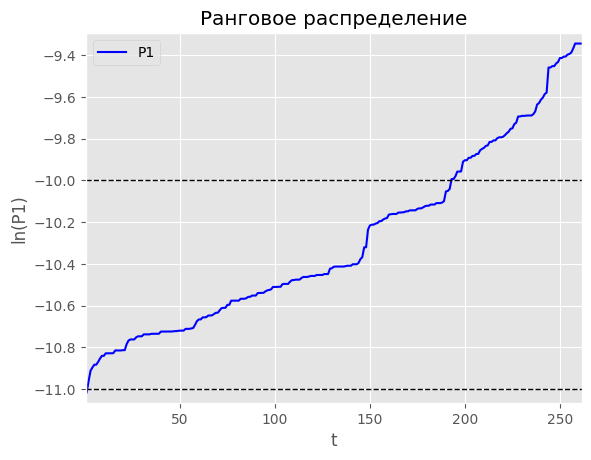

In [ ]:
t = [i for i in range(1, len(ln_p_1) + 1)]

plt.plot(t, sorted(ln_p_1), color='blue', label='P1')
for i in range(-100, 100):
    plt.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_1) - 0.05, max(ln_p_1) + 0.05)
plt.xlabel('t')
plt.ylabel('ln(P1)')
plt.title('Ранговое распределение')
plt.legend()

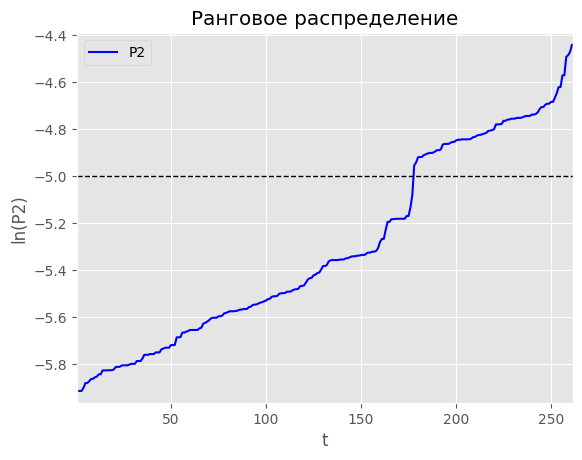

In [ ]:
t = [i for i in range(1, len(ln_p_2) + 1)]

plt.plot(t, sorted(ln_p_2), color='blue', label='P2')
for i in range(-100, 100):
    plt.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_2) - 0.05, max(ln_p_2) + 0.05)
plt.xlabel('t')
plt.ylabel('ln(P2)')
plt.title('Ранговое распределение')
plt.legend()

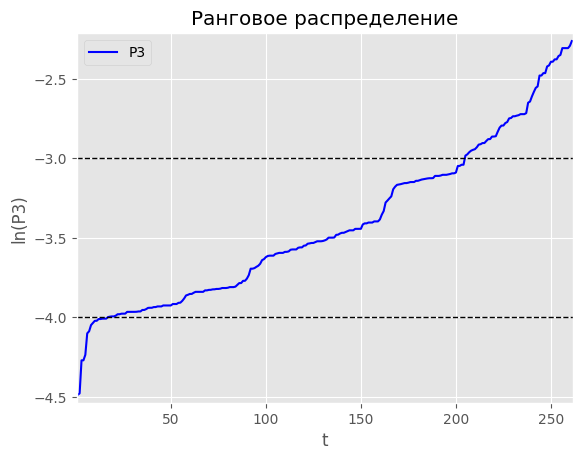

In [ ]:
t = [i for i in range(1, len(ln_p_3) + 1)]

plt.plot(t, sorted(ln_p_3), color='blue', label='P3')
for i in range(-100, 100):
    plt.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_3) - 0.05, max(ln_p_3) + 0.05)
plt.xlabel('t')
plt.ylabel('ln(P3)')
plt.title('Ранговое распределение')
plt.legend()

Любопытно отметить, что с небольшой погрешностью, но на каждом "перегибе" рангового распределения чётко происходит квантование по экспоненте: $_\cdots, e^{-2}, e^{-1}, e^0, e^1, e^2, _\cdots$

Как говорится, *вам это ничего не напоминает?*

## Этап 4: Точечная диаграмма. Реализация классификатора.

Далее перейдём к визуализации безразмерных комплексов относительно друг друга. Мы построим своего рода "классификатор", который базируется на построенных ранее графиках.

### 4.1 (ln(P1), ln(P2))

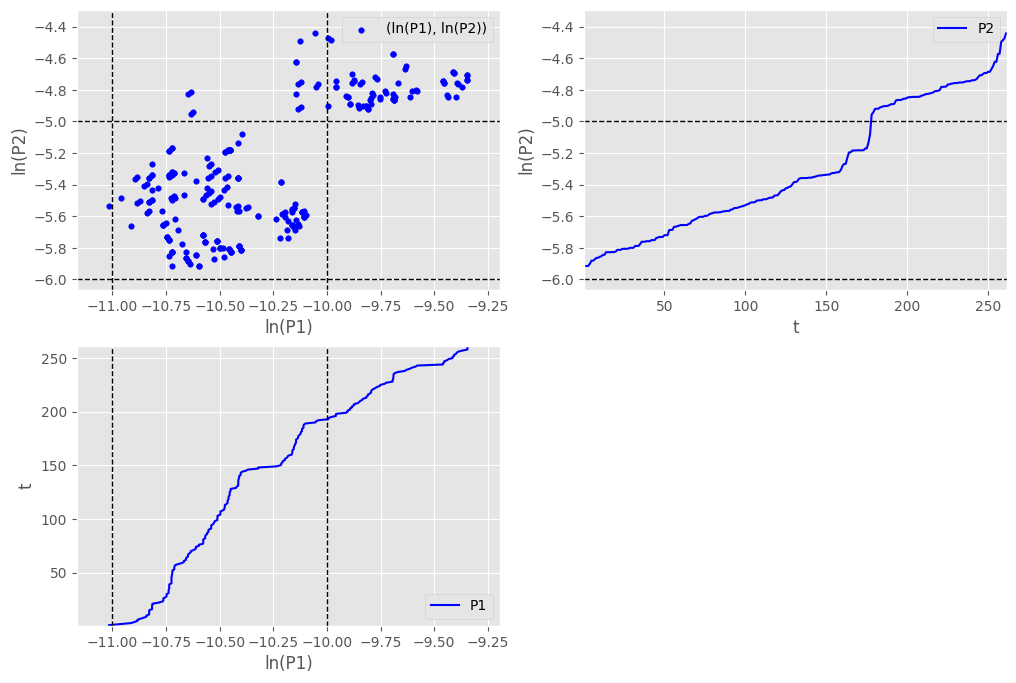

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.arange(0, 5, 0.2))
ax1.scatter(ln_p_1, ln_p_2, color='blue', s=15, label='(ln(P1), ln(P2))')
for i in range(-100, 100):
    ax1.axhline(i, color='black', linestyle='--', lw=1)
    ax1.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.xlabel('ln(P1)')
plt.ylabel('ln(P2)')
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot([i for i in range(1, len(ln_p_2) + 1)], sorted(ln_p_2), color='blue', label='P2')
for i in range(-100, 100):
    ax2.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.xlabel('t')
plt.ylabel('ln(P2)')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(sorted(ln_p_1), [i for i in range(1, len(ln_p_1) + 1)], color='blue', label='P1')
for i in range(-100, 100):
    ax3.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(t) - 0.5, max(t) + 0.5)
plt.xlabel('ln(P1)')
plt.ylabel('t')
ax3.legend()

На данной диаграмме видно, как квантование по экспоненте практически чётко отделяет два облака данных. В каждом прямоугольнике сконцентрированно наибольшее количество объектов, что позволяет сделать вывод о сильном отличии характеристик автомобилей (объём топливного бака и время, требуемое для разгона до 100 км в час).

### 4.2 (ln(P1), ln(P3))

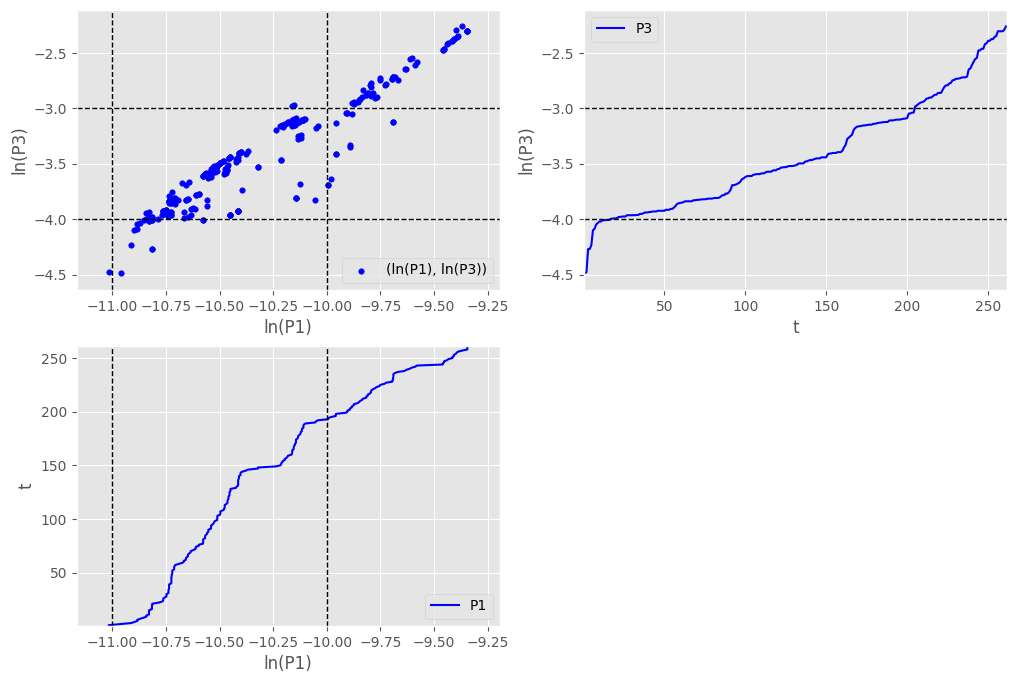

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.arange(0, 5, 0.2))
ax1.scatter(ln_p_1, ln_p_3, color='blue', s=15, label='(ln(P1), ln(P3))')
for i in range(-100, 100):
    ax1.axhline(i, color='black', linestyle='--', lw=1)
    ax1.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(ln_p_3) - 0.15, max(ln_p_3) + 0.15)
plt.xlabel('ln(P1)')
plt.ylabel('ln(P3)')
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot([i for i in range(1, len(ln_p_3) + 1)], sorted(ln_p_3), color='blue', label='P3')
for i in range(-100, 100):
    ax2.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_3) - 0.15, max(ln_p_3) + 0.15)
plt.xlabel('t')
plt.ylabel('ln(P3)')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(sorted(ln_p_1), [i for i in range(1, len(ln_p_1) + 1)], color='blue', label='P1')
for i in range(-100, 100):
    ax3.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(t) - 0.5, max(t) + 0.5)
plt.xlabel('ln(P1)')
plt.ylabel('t')
ax3.legend()

На этом графике чётко видна корреляция между объёмом топливного бака и максимальной скоростью автомобиля. Вычислим коэффициент корреляции Пирсона и проверим его статистическую значимость с помощью t-статистики.

In [ ]:
def corr(ln_p_1, ln_p_3):
    ln_p_1 = np.array(ln_p_1)
    ln_p_3 = np.array(ln_p_3)

    mean_X = sum(ln_p_1) / len(ln_p_1)
    mean_Y = sum(ln_p_3) / len(ln_p_3)
    mean_XY = sum(ln_p_1 * ln_p_3) / len(df)
    Sx = np.sqrt(sum(ln_p_1 ** 2 - mean_X ** 2) / (len(df)))
    Sy = np.sqrt(sum(ln_p_3 ** 2 - mean_Y ** 2) / (len(df)))

    r = (mean_XY - mean_X * mean_Y) / (Sx * Sy)

    chedock = ''
    if  abs(r) > 0.9:
      chedock = 'весьма высокая'
    elif abs(r) > 0.7:
      chedock = 'высокая'
    elif abs(r) > 0.5:
      chedock = 'заметная'
    elif abs(r) > 0.3:
      chedock = 'умеренная'
    elif abs(r) > 0.1:
      chedock = 'слабая'
    return r, chedock

In [ ]:
def t_(r, n=len(df)):
  t_crit = abs(r) * np.sqrt((n - 2) / (1 - r ** 2))
  if abs(t_crit) > scipy.stats.t.ppf(1 - 0.025, n - 2):

    return 'Коэффициент корреляции значительно отличается от нуля', f'{abs(t_crit)} > {scipy.stats.t.ppf(1-0.05/2, n-2)}'

In [ ]:
r, _ = corr(ln_p_1, ln_p_3)
print('Коэффициент корреляции =', r)

print('Корреляция по шкале Чеддока -', corr(ln_p_1, ln_p_3)[1])
print(t_(r))

Коэффициент корреляции = 0.9416651541638292
Корреляция по шкале Чеддока - весьма высокая
('Коэффициент корреляции значительно отличается от нуля', '45.02929902718463 > 1.969165556357771')


Результаты подтвердили сильную линейную зависимость данных безразмерных комплексов.

### 4.3 (ln(P2), ln(P3))

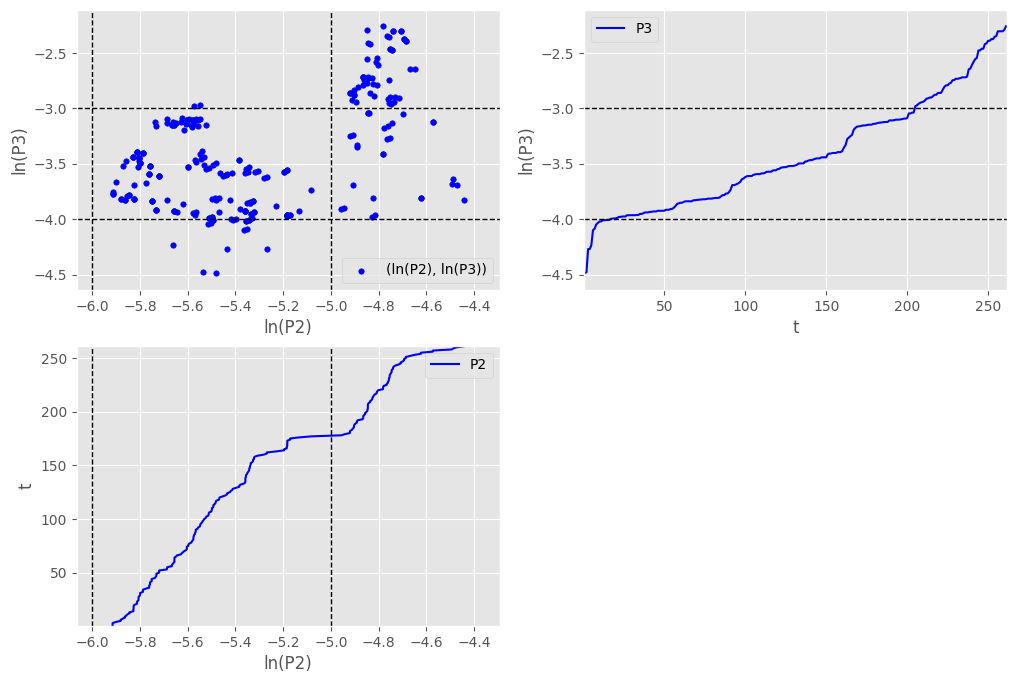

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.arange(0, 5, 0.2))
ax1.scatter(ln_p_2, ln_p_3, color='blue', s=15, label='(ln(P2), ln(P3))')
for i in range(-100, 100):
    ax1.axhline(i, color='black', linestyle='--', lw=1)
    ax1.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.ylim(min(ln_p_3) - 0.15, max(ln_p_3) + 0.15)
plt.xlabel('ln(P2)')
plt.ylabel('ln(P3)')
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot([i for i in range(1, len(ln_p_3) + 1)], sorted(ln_p_3), color='blue', label='P3')
for i in range(-100, 100):
    ax2.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_3) - 0.15, max(ln_p_3) + 0.15)
plt.xlabel('t')
plt.ylabel('ln(P3)')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(sorted(ln_p_2), [i for i in range(1, len(ln_p_2) + 1)], color='blue', label='P2')
for i in range(-100, 100):
    ax3.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.ylim(min(t) - 0.5, max(t) + 0.5)
plt.xlabel('ln(P2)')
plt.ylabel('t')
ax3.legend()

На 3-ем графике ситуация аналогична 1-му. Однако здесь довольно много объектов, выделяющихся из общей массы каждого облака данных, что может свидетельствовать об уникальности данных экзмепляров автомобилей.

## Этап 5: Критический уровень

Завершающий этап представляет из себя вычисление критического значения характеристик автомобилей. Здесь необходимо воспользоваться таблицей, содержащей реперные значения различных физических величин.

Реперная таблица:
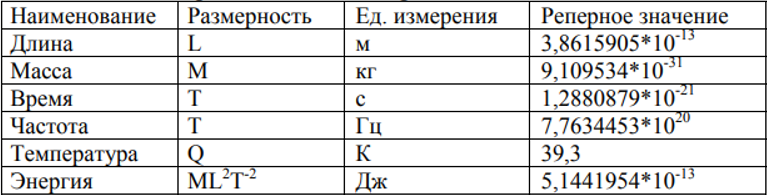

In [ ]:
D = 'Объём топливного бака'
E = 'Разгон до 100 км в час'
F = 'Максимальная скорость'

d = df['Объём топливного бака [м^3]'] * (3.8615905 * 10 ** -13)
e = df['Разгон до 100 км/ч [сек]'] * (1.2880879 * 10 ** -21)
f = df['Максимальная скорость [м/c]'] * ((3.8615905 * 10 ** -13) / (1.2880879 * 10 ** -21))

Далее будем строить графики и выделять на них "границу", пройти которую показатели автомобилей наших данных не смогут.

### 5.1 (d, e)

Критическое значение для Объём топливного бака и Разгон до 100 км в час равно 2.8961928750000005e-14 и 2.6405801949999997e-20 соответсвтенно


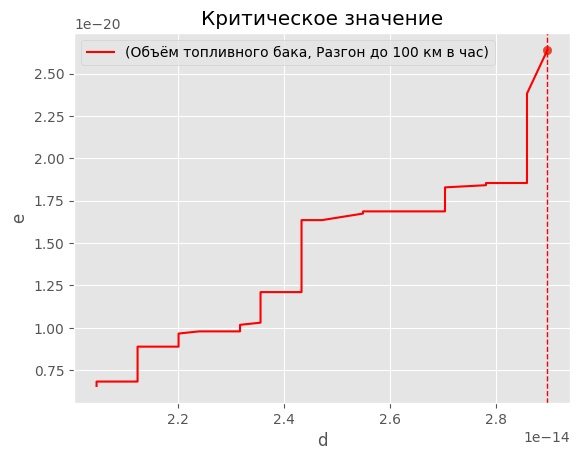

In [ ]:
print(f'Критическое значение для {D} и {E} равно {max(d)} и {max(e)} соответсвтенно')
plt.plot(sorted(d), sorted(e), color='red', label=f'({D}, {E})')
plt.scatter(max(d), max(e))
plt.axvline(max(d), color='red', linestyle='--', lw=1)
plt.xlabel('d')
plt.ylabel('e')
plt.title('Критическое значение')
plt.legend()

### 5.2 (d, f)

Критическое значение для Объём топливного бака и Максимальная скорость равно 2.8961928750000005e-14 и 20835576496.75927 соответсвтенно


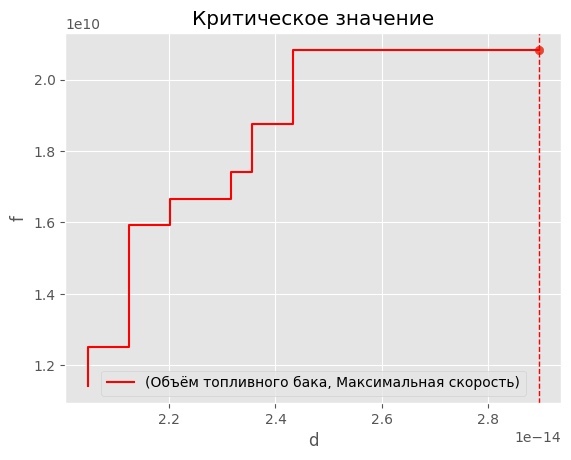

In [ ]:
print(f'Критическое значение для {D} и {F} равно {max(d)} и {max(f)} соответсвтенно')
plt.plot(sorted(d), sorted(f), color='red', label=f'({D}, {F})')
plt.scatter(max(d), max(f))
plt.axvline(max(d), color='red', linestyle='--', lw=1)
plt.xlabel('d')
plt.ylabel('f')
plt.title('Критическое значение')
plt.legend()

### 5.3 (e, f)

Критическое значение для Разгон до 100 км в час и Максимальная скорость равно 2.6405801949999997e-20 и 20835576496.75927 соответсвтенно


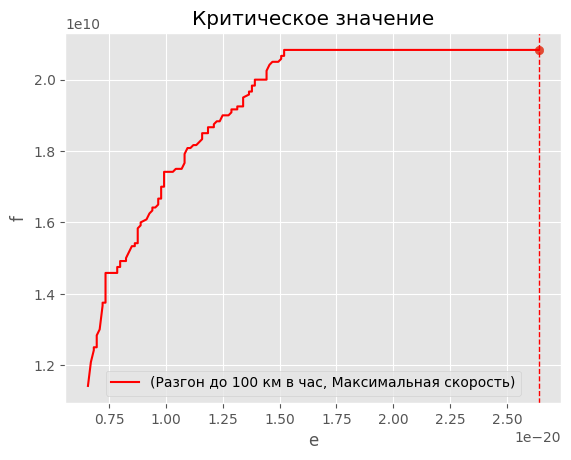

In [ ]:
print(f'Критическое значение для {E} и {F} равно {max(e)} и {max(f)} соответсвтенно')
plt.plot(sorted(e), sorted(f), color='red', label=f'({E}, {F})')
plt.scatter(max(e), max(f))
plt.axvline(max(e), color='red', linestyle='--', lw=1)
plt.xlabel('e')
plt.ylabel('f')
plt.title('Критическое значение')
plt.legend()

В ходе данной работы был проведён анализ набора данных легковых автомобилей с помощью теории безразмерных комплексов. Результаты показали, что данные методы хорошо демонстрируют на графиках группы данных выделяющиеся на общем фоне и тем самым являются неплохим подспорьем для проведения более глубоких исследовательских задач.

Выполненные в работе задачи:
1. Выбран и утверждён объект исследования (автомобили)
2. Построены безразмерные комплексы
3. Построены ранговые распределения, уровни квантования
4. Составлен классификатор безразмерных комплексов
5. Применена система критических единиц